# CAPSTONE PROJECT
## Predicting the Probability of Default of Bank Loans
 
> The objective of the project is to build a model to predict default in the future. This will help the company (XYZ in our case) in deciding whether or not to pass the loan.

## 0. The Pre-requisites
### 0.1 Importing Libraries

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The libraries for models and stats functions will be imported in the same cell where they'll be used for better clarity and understanding of the reader.

### 0.2 Setting Up Some Options

In [295]:
pd.set_option('display.max_columns', 500)  # increase the default no. of columns that will be printed
pd.set_option('display.max_rows', 5000)    # increase the default no. of rows that will be printed
pd.set_option('display.max_colwidth', 500) # increase column width to accommodate column contents properly
pd.options.mode.chained_assignment = None  # disable printing unnecessary warnings 
%matplotlib notebook                       
# inline figures having controls to change the size of diagrams as needed

### 0.3 Setting Seed

In [296]:
np.random.seed(2806)

## 1. Exploratory Data Analysiis
### 1.1 Importing Data

In [297]:
path = "C:\\Users\\Fahim Usman\\Documents\\Edu\\Data Science\\Capstone Project\\Python\\Lending_data.csv"
data = pd.read_csv(path)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,01-12-11,n,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,01-01-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,01-01-15,171.62,NaN,01-01-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,01-12-11,n,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pas...,car,bike,309xx,GA,1.00,0,01-04-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,01-04-13,119.66,NaN,01-09-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,01-12-11,n,NaN,small_business,real estate business,606xx,IL,8.72,0,01-11-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,01-06-14,649.91,NaN,01-01-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,01-12-11,n,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0,01-02-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,01-01-15,357.48,NaN,01-01-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,01-12-11,n,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",other,Personal,972xx,OR,17.94,0,01-01-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,01-01-16,67.79,01-02-16,01-01-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### 1.2 Data Cleaning
Just by looking at the first few rows, we can elimminate a few columns from our data set. Those variables are mentioned below -  
1. **id**, **member_id** - these are identifiers so we will keep only one of them i.e. the **id** variable
2. **emp_title** - it's a list of company or places where people work rather than actual titles like Software Engineer or Data Scientist  
3. **desc** - Unnecessary and lot of it is client written text with little to no excess information than that obtained from **purpose** variable  
4. **zip_code** - Unnecessary for the problem at hand

In [298]:
data.shape

(855969, 73)

In [299]:
df = data.drop(['member_id', 'emp_title', 'desc', 'zip_code'], axis = 1)
print(df.shape)

(855969, 69)


In [300]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,01-12-11,n,credit_card,Computer,AZ,27.65,0,01-01-85,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,01-01-15,171.62,NaN,01-01-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,01-12-11,n,car,bike,GA,1.00,0,01-04-99,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,01-04-13,119.66,NaN,01-09-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,01-12-11,n,small_business,real estate business,IL,8.72,0,01-11-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,01-06-14,649.91,NaN,01-01-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,01-12-11,n,other,personel,CA,20.00,0,01-02-96,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,01-01-15,357.48,NaN,01-01-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,01-12-11,n,other,Personal,OR,17.94,0,01-01-96,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,01-01-16,67.79,01-02-16,01-01-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Now, we will find variables having missing values. From the first few rows, it is clear that there are a few columns that has a lot of missing information. We will first drop the columns having more than 70% missing values.

In [301]:
n = []
cols = list(df.iloc[:, 1:-1].columns)
for col in cols:
    if (df[col].isna().sum() / len(df)) >= 0.7:
        n.append(col)

print("Columns having over 70% missing values -", n, sep = '\n')

Columns having over 70% missing values -
['mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [302]:
# dropping the above variables
df = df.drop(n, axis = 1)
df.shape

(855969, 50)

Now, let's take a look at the remaining variables having missing values.

In [303]:
# removing dropped variables from cols
for e in n:
    cols.remove(e)

# rest of the remaining variables' missing proportion
n = []
for e in cols:
    if df[e].isna().sum() > 0:
        n.append(e)
        print(e, ">>>", format((df[e].isna().sum() / len(df)) * 100, ".2f"), "%")

emp_length >>> 5.03 %
title >>> 0.00 %
mths_since_last_delinq >>> 51.38 %
revol_util >>> 0.05 %
last_pymnt_d >>> 1.04 %
next_pymnt_d >>> 29.55 %
last_credit_pull_d >>> 0.01 %
collections_12_mths_ex_med >>> 0.01 %
tot_coll_amt >>> 7.86 %
tot_cur_bal >>> 7.86 %
total_rev_hi_lim >>> 7.86 %


What we will do is drop the rows for columns having missing values <10% as we have enough data to compensate for that. So, we will have to take care of the two variables that concern us. First, let's consider **mths_since_last_delinq** which is *the number of months since last delinquency (late payment or non-payment of installment)*. This variable could be critial for predicting default but it has over 50% missing values. Imputing these many missing values is a huge stress on our resources and just replacing them with the mode or median means introducing a huge amount of bias in our data. So, we will first see if this variable has any definitive impact on the predictor.

<IPython.core.display.Javascript object>


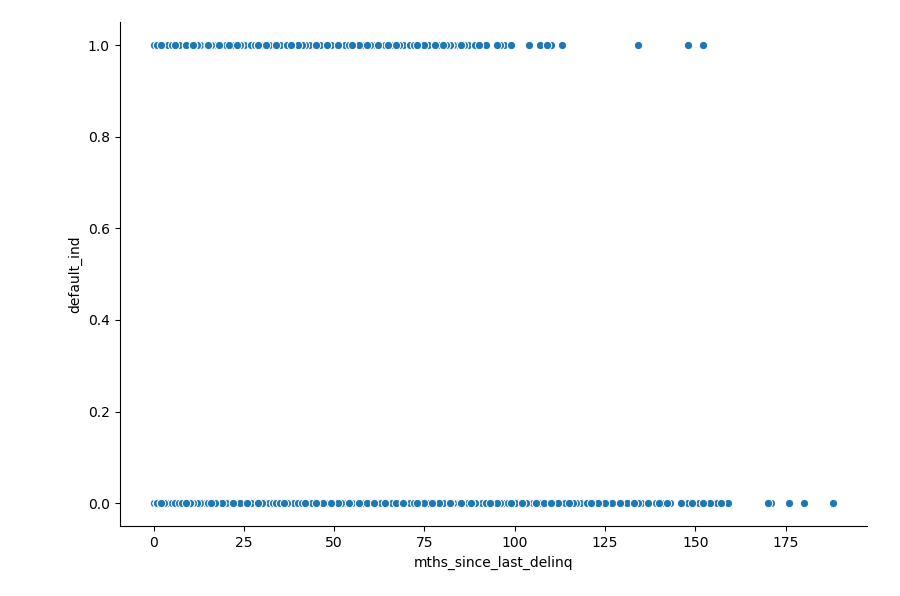

In [42]:
sns.relplot(x = 'mths_since_last_delinq', y = 'default_ind', data = df)

As can be seen in the above plot, there's no evidence of a significant relation between the no. of months since last delinquency and default. Hence, we will ignore this variable and eventually drop it from our dataset.

Now, another variable is **next_pymnt_d**. The NAs in this column may simply mean that the client has paid all their dues and has no more payments to make. But, how to accomodate that in the data. Well, if we give a bit of a thought, default and when the client has to make the next payment has little relation. What matters is when the client made their last payment and if there were any recent delinquencies. So, we will drop that variable as well.

As for the other variables, we will just drop the observations as they are significantly less than the total number of observations.

In [304]:
df = df.drop(['mths_since_last_delinq', 'next_pymnt_d'], axis = 1)
df = df.dropna()
df.shape

(739020, 48)

### 1.3 Variable Transformation

In [305]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
39694,10149342,27050,27050,27050.0,36 months,10.99,885.46,B,B2,10+ years,OWN,55000.0,Verified,01-12-13,n,debt_consolidation,Debt Consolidation,MI,22.87,0,01-10-86,0,14,0,36638,61.2,27,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,01-01-16,885.46,01-12-15,0.0,1,INDIVIDUAL,0,0.0,114834.0,59900.0,0
39695,10159584,9750,9750,9750.0,36 months,13.98,333.14,C,C1,1 year,RENT,26000.0,Not Verified,01-12-13,n,debt_consolidation,Debt Consilation,CA,25.12,0,01-01-07,0,12,0,7967,52.8,28,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,01-01-16,333.14,01-01-16,0.0,1,INDIVIDUAL,0,0.0,14123.0,15100.0,0
39696,10159498,12000,12000,12000.0,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,105000.0,Not Verified,01-12-13,n,debt_consolidation,UNIVERSAL CARD,CT,14.05,0,01-03-94,1,12,0,13168,21.6,22,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,01-01-16,368.45,01-01-16,0.0,1,INDIVIDUAL,0,0.0,267646.0,61100.0,0
39697,10139658,12000,12000,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,Source Verified,01-12-13,n,debt_consolidation,Debt consolidation,NM,16.94,0,01-10-98,0,7,2,5572,68.8,32,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,01-09-15,119.17,01-01-16,0.0,1,INDIVIDUAL,0,15386.0,13605.0,8100.0,0
39698,10159548,15000,15000,15000.0,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,63000.0,Not Verified,01-12-13,n,debt_consolidation,Pay off,FL,16.51,0,01-03-98,0,8,0,11431,74.2,29,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,01-01-16,476.30,01-01-16,0.0,1,INDIVIDUAL,0,1514.0,272492.0,15400.0,0


In [306]:
# converting term from '36 months' to just '36'
def extract(x):
    a = x.strip()
    return float(a.split(' ')[0])

df['term'] = df['term'].apply(extract)
df['term'].unique()

array([36., 60.])

In [307]:
df['emp_length'].unique()

array(['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years',
       '5 years', '6 years', '9 years', '8 years', '< 1 year'],
      dtype=object)

For convenience, in case of **emp_length**, we will keep 10+ years as 10 and < 1 years as 1

In [308]:
# converting emp_length to float
def extract(x):
    if x == '< 1 year':
        return 1.0
    elif x == '10+ years':
        return 10.0
    else:
        return float(x.split(' ')[0])

df['emp_length'] = df['emp_length'].apply(extract)
df['emp_length'].unique()

array([10.,  1.,  2.,  4.,  3.,  7.,  5.,  6.,  9.,  8.])

### 1.4 Dealing with Datetimes
Datetime variables are of no use for us in their original form. For our model to make sense of it, we need to extract some meaningful numbers out of them. So let's first see which are the datetime variables in our dataset, what they mean and then how they can be interpreted.

1. **issue_d** - This is the variable which we will use to split our dataset into training and testing sets.  
2. **last_pymnt_d** - Last month payment was received  
> This is an insignificant variable because the value may be several months before in case the payments are over. What we are concerned usually to predict defaults is whether or not the last payment was done. If the payment was not done, there will delinquencies recoreded which are covered in other variables - **delinq_2yrs** and **inq_last_6mths**. So, we will drop this variable.
3. **earliest_cr_line** - The month the borrower's earliest reported credit line was opened  
4. **last_credit_pull_d** -	The most recent month XYZ corp. pulled credit for this loan  
> The importance of these two variables is a little vague for our understanding but to prevent loss of data, we will convert them into periods. We will create two new variables - **days_early_cr_line (issue_d - earliest_cr_line) and days_latest_cr_line (last_credit_pull_d - issue_d)**

In [310]:
# getting datetime variables into a list
dt = ['issue_d', 'last_pymnt_d', 'earliest_cr_line', 'last_credit_pull_d']

# converting objecs in df to datetimes
for e in dt:
    df[e] = df[e].astype("Datetime64")

df[dt].dtypes

issue_d               datetime64[ns]
last_pymnt_d          datetime64[ns]
earliest_cr_line      datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object

In [311]:
df = df.drop('last_pymnt_d', axis = 1)
df['days_early_cr_line'] = df['issue_d'] - df['earliest_cr_line']
df['days_latest_cr_line'] = df['last_credit_pull_d'] - df['issue_d']
df = df.drop(['earliest_cr_line', 'last_credit_pull_d'], axis = 1)
df.shape

(739020, 47)

In [312]:
df['days_early_cr_line'] = df['days_early_cr_line'].astype(str)
df['days_latest_cr_line'] = df['days_latest_cr_line'].astype(str)

# function to convert timestamps to date
def extract(x):
    return float(x.split(' ')[0])

df['days_early_cr_line'] = df['days_early_cr_line'].apply(extract)
df['days_latest_cr_line'] = df['days_latest_cr_line'].apply(extract)

### 1.5 Distributions and Frequencies

In [313]:
# reordering columns
df = pd.concat([df[['id', 'issue_d']], df.drop(['id', 'issue_d', 'default_ind'], axis = 1), df['default_ind']], axis = 1)

In [314]:
# getting numeric and categorical columns
num = []
cat = []

for e in df.iloc[:, 2:-1]:
    if (df[e].dtype == 'int64') | (df[e].dtype == 'float64'):
        num.append(e)
    else:
        cat.append(e)
        
print(num, cat, sep = '\n\n')

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'days_early_cr_line', 'days_latest_cr_line']

['grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'initial_list_status', 'application_type']


In [315]:
%matplotlib inline
# draw plots inline with default size

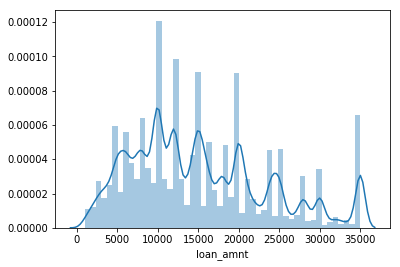

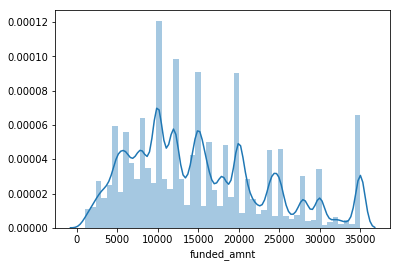

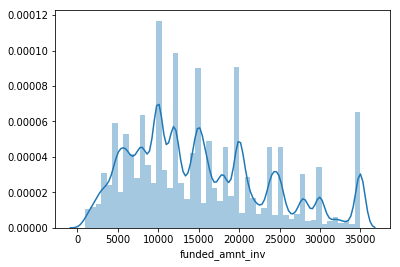

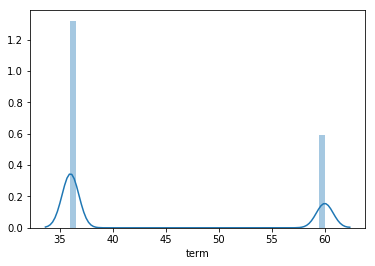

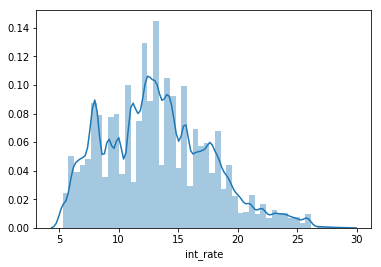

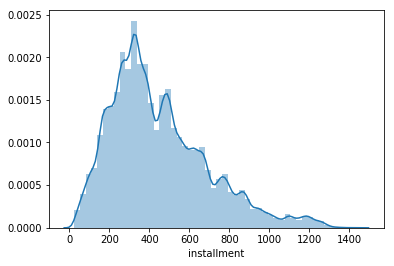

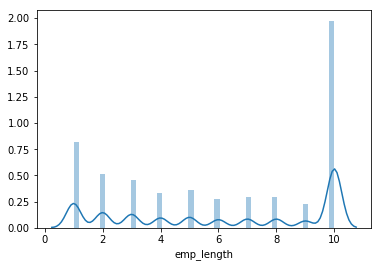

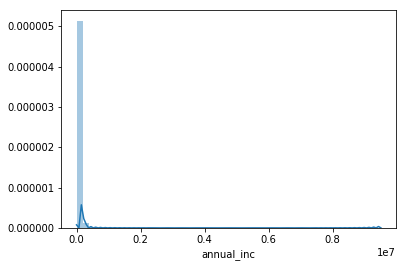

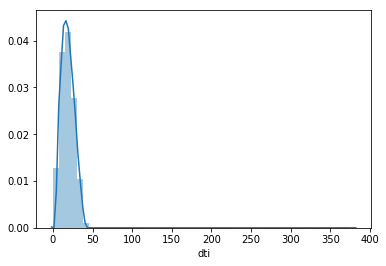

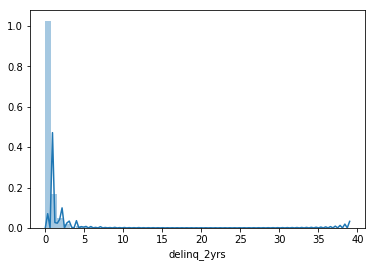

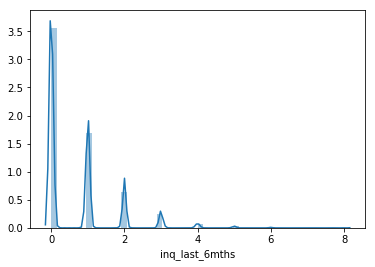

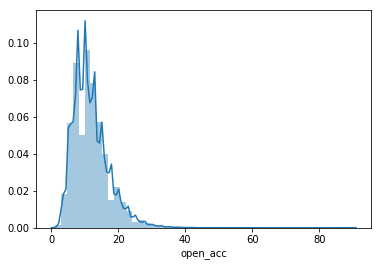

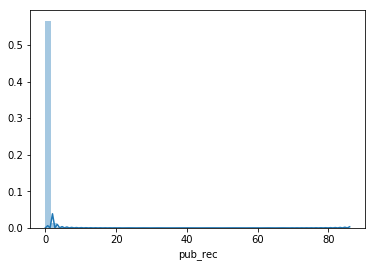

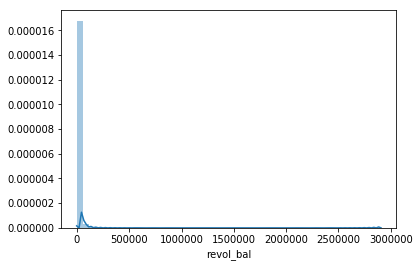

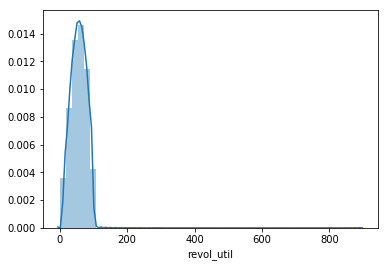

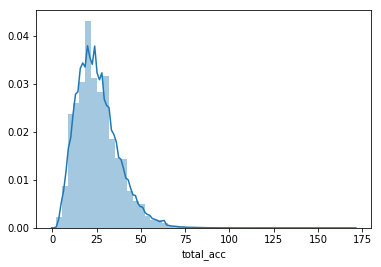

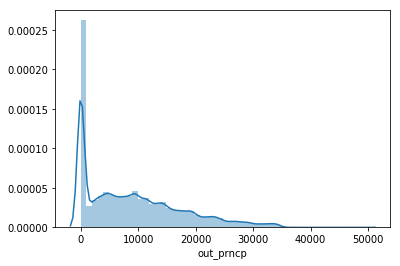

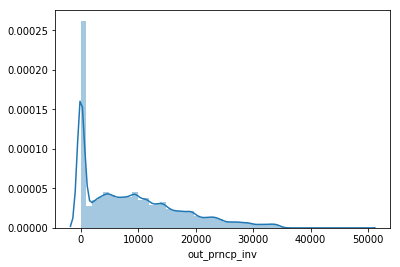

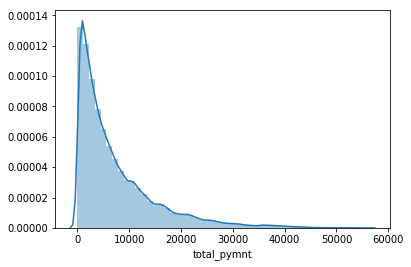

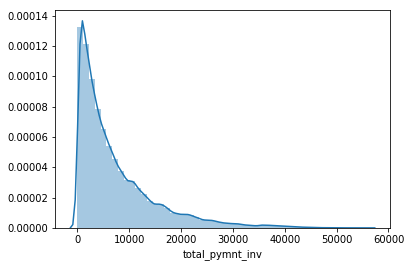

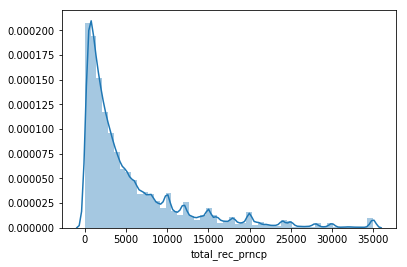

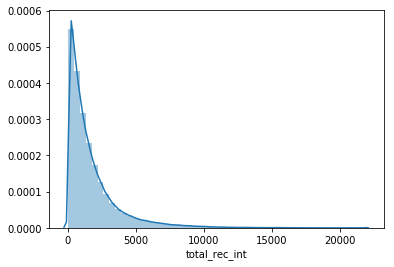

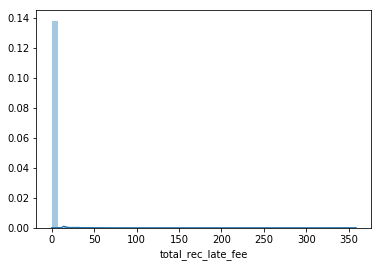

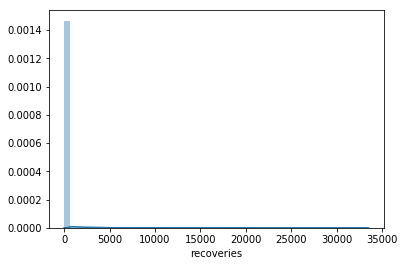

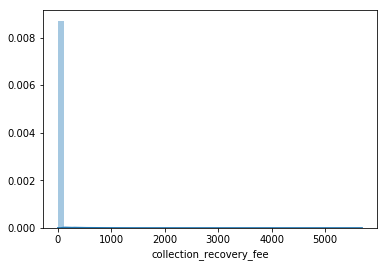

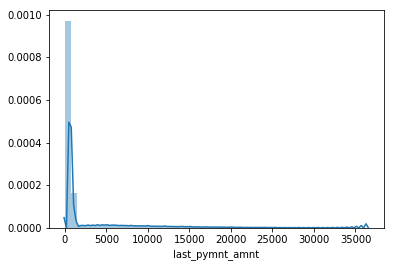

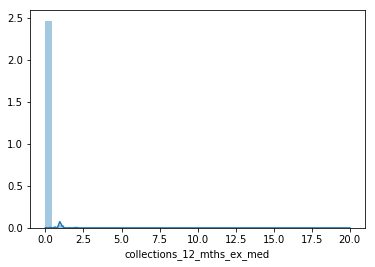

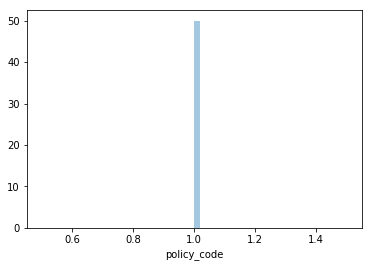

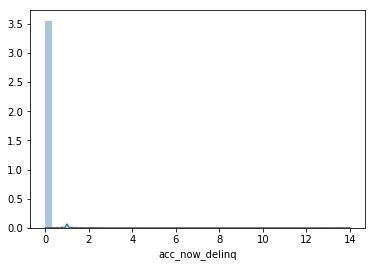

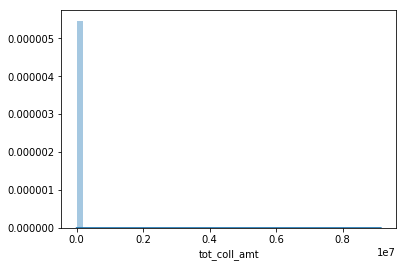

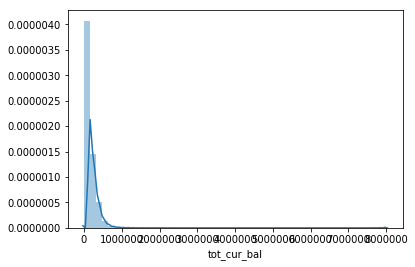

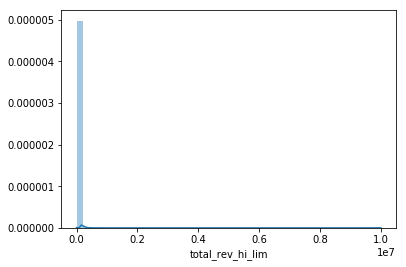

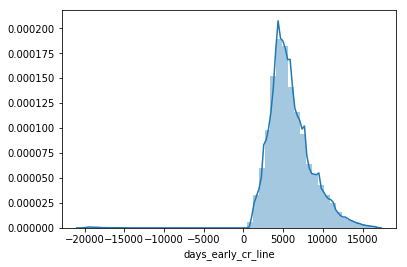

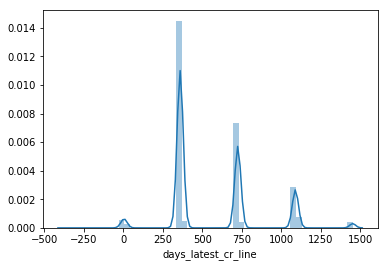

In [202]:
# for numeric variables
for e in num:
    plt.figure();
    sns.distplot(df[e]);

Since we see that a few variables have only a handful of unique values, we will see if we have mistaken any categorical variables as numeric.

In [316]:
for e in num:
    if df[e].value_counts().count() <= 10:
        print(e, ">>>", df[e].value_counts().count())
        
df['acc_now_delinq'].value_counts(normalize = True)

term >>> 2
emp_length >>> 10
inq_last_6mths >>> 9
policy_code >>> 1
acc_now_delinq >>> 8


0     0.994991
1     0.004709
2     0.000248
3     0.000038
4     0.000008
5     0.000004
14    0.000001
6     0.000001
Name: acc_now_delinq, dtype: float64

1. **policy_code** has only one unique value so we will drop that variable.
2. **term** has ony 2 values but we will keep it numeric as it's nnumber of months.
3. We will keep **emp_length** and **inq_last_6mths** untouched as they are all true numerics.
4. **acc_now_delinq** is highly skewed (one value takes 99.49 % of distribution) so we will drop that variable.

In [318]:
num.remove('policy_code')
num.remove('acc_now_delinq')
df = df.drop(['policy_code', 'acc_now_delinq'], axis = 1)
df.shape

(739020, 45)

Another thing we should do is see if any of the numeric column has one value that dominates the variable (over 95 % values are same). We should drop such columns due to low variance.

In [319]:
for e in num:
    if df[e].value_counts(normalize = True).max() > 0.95:
        print(e, df[e].value_counts(normalize = True)[0], sep = ' >>> ')
        print()

total_rec_late_fee >>> 0.9908500446537306

recoveries >>> 0.9789518551595356

collection_recovery_fee >>> 0.97944710562637

collections_12_mths_ex_med >>> 0.9859611377229304



As can be seen, there are 4 such variables which need to be removed.

In [320]:
df = df.drop(['total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med'], axis = 1)
df.shape

(739020, 41)

For categorical variables, we will see if a category dominates a variable (occupies over 80% of values). In such cases, we will simply eliminate, or drop, those variables.

In [321]:
# for categorical variables
for e in cat:
    if df[e].value_counts(normalize = True).max() > 0.8:
        print(e, df[e].value_counts(normalize = True), sep = '\n###################################\n')

pymnt_plan
###################################
n    0.999996
y    0.000004
Name: pymnt_plan, dtype: float64
application_type
###################################
INDIVIDUAL    0.999564
JOINT         0.000436
Name: application_type, dtype: float64


In [322]:
# dropping above variables
cat.remove('pymnt_plan')
cat.remove('application_type')
df = df.drop(['application_type', 'pymnt_plan'], axis = 1)
df.shape

(739020, 39)

Now, we will see the number of levels of the remaining categorical variables and try to see if we can minimize the amount of levels in those variables.

In [323]:
for e in cat:
    print(e, ">>>", df[e].value_counts().count())

grade >>> 7
sub_grade >>> 35
home_ownership >>> 6
verification_status >>> 3
purpose >>> 14
title >>> 36794
addr_state >>> 51
initial_list_status >>> 2


The number of levels in **sub_grade, title and addr_state** are too high.  
1. We will drop **title** as it is mostly redundant (we have annual income which is a much better indicator of a person's capability to pay off loans than their positions of work). 
2. We will also lose **sub_grade** as we have **grade** from which **sub_grade** is derived (multicollinearity).
3. We will also lose **addr_state** just for the sake of convenience (prevents us from creating 50 dummy variables for a variable which, in most cases, doesn't hold much value when granting loans).

In [324]:
cat.remove('sub_grade')
cat.remove('title')
cat.remove('addr_state')
df = df.drop(['sub_grade', 'title', 'addr_state'], axis = 1)
df.shape

(739020, 36)

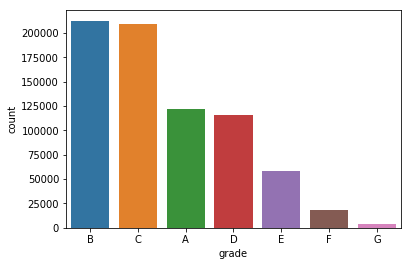

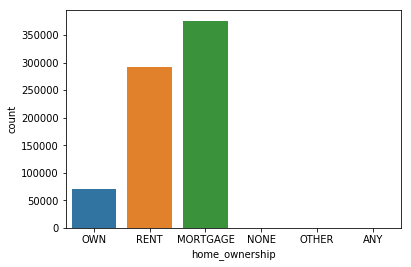

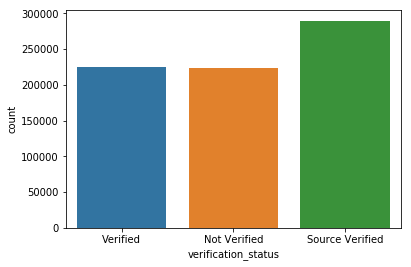

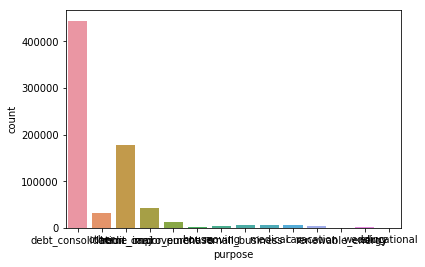

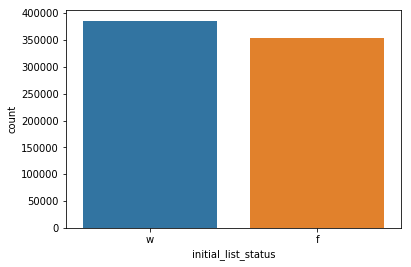

In [241]:
# distributions of categorical variables
for e in cat:
    plt.figure();
    sns.countplot(df[e])

Let's take a look at their numeric distribution too.

In [325]:
print("Percentage distribution of each variable\n")
for e in cat:
    print(e, " >>>\n", df[e].value_counts(normalize = True) * 100, sep = '')
    print()

Percentage distribution of each variable

grade >>>
B    28.743200
C    28.227112
A    16.456253
D    15.634218
E     7.868393
F     2.505074
G     0.565749
Name: grade, dtype: float64

home_ownership >>>
MORTGAGE    50.871018
RENT        39.625450
OWN          9.492030
OTHER        0.005683
NONE         0.005548
ANY          0.000271
Name: home_ownership, dtype: float64

verification_status >>>
Source Verified    39.186626
Verified           30.475495
Not Verified       30.337880
Name: verification_status, dtype: float64

purpose >>>
debt_consolidation    60.092555
credit_card           23.992449
home_improvement       5.649915
other                  4.371871
major_purchase         1.710644
small_business         0.910260
medical                0.882249
car                    0.819328
moving                 0.544911
vacation               0.492544
house                  0.366025
wedding                0.114882
renewable_energy       0.052231
educational            0.000135
Name: purpo

To relevel, we will do the following - 
1. **grade** - A, B, C, D, E, Other
2. **home_ownership** - remove observations having 'OTHER', 'NONE' and 'ANY' as they are very few (less than 0.01 %)
3. **purpose** - debt_consolidation, credit_card, home_improvement, other

In [326]:
# releveling
df['grade'][df['grade'].isin(['F', 'G'])] = 'Other'

df['purpose'][~df['purpose'].isin(['debt_consolidation', 'credit_card', 'home_improvement'])] = 'other'

df = df[df.home_ownership.isin(['OWN', 'RENT', 'MORTGAGE'])]

In [327]:
df.shape

(738935, 36)

### 1.6 Multicollinearity

In [328]:
# getting numeric and categorical columns once again
num = []
cat = []

for e in df.iloc[:, 2:-1]:
    if (df[e].dtype == 'int64') | (df[e].dtype == 'float64'):
        num.append(e)
    else:
        cat.append(e)
        
print(num, cat, sep = '\n\n')

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'days_early_cr_line', 'days_latest_cr_line']

['grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']


In [329]:
corr_mat = df[num].corr()
corr_mat.style.background_gradient(cmap = "coolwarm").set_precision(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,days_early_cr_line,days_latest_cr_line
loan_amnt,1,1,1,0.41,0.13,0.94,0.097,0.33,0.032,-0.0079,-0.028,0.18,-0.087,0.33,0.12,0.21,0.66,0.66,0.48,0.48,0.39,0.54,0.22,-0.004,0.32,0.31,0.18,-0.032
funded_amnt,1,1,1,0.41,0.13,0.94,0.097,0.33,0.032,-0.0079,-0.028,0.18,-0.087,0.33,0.12,0.21,0.66,0.66,0.48,0.48,0.39,0.54,0.22,-0.004,0.32,0.31,0.18,-0.032
funded_amnt_inv,1,1,1,0.41,0.13,0.94,0.097,0.33,0.032,-0.0079,-0.028,0.18,-0.087,0.33,0.12,0.21,0.66,0.66,0.48,0.48,0.39,0.54,0.22,-0.004,0.32,0.31,0.18,-0.033
term,0.41,0.41,0.41,1,0.43,0.14,0.065,0.05,0.11,-0.0049,-0.004,0.08,-0.026,0.089,0.087,0.097,0.4,0.4,0.069,0.069,-0.038,0.38,0.063,-0.0022,0.11,0.061,0.059,-0.059
int_rate,0.13,0.13,0.13,0.43,1,0.11,0.0055,-0.085,0.16,0.049,0.24,-0.019,0.05,-0.044,0.25,-0.044,0.023,0.023,0.18,0.18,0.061,0.45,0.11,0.0012,-0.092,-0.16,-0.11,0.12
installment,0.94,0.94,0.94,0.14,0.11,1,0.081,0.32,0.015,0.00035,0.0059,0.17,-0.075,0.32,0.13,0.19,0.55,0.55,0.52,0.52,0.45,0.51,0.24,-0.0033,0.29,0.28,0.16,0.0015
emp_length,0.097,0.097,0.097,0.065,0.0055,0.081,1,0.059,0.033,0.022,-0.0039,0.029,0.028,0.083,0.033,0.092,0.061,0.061,0.056,0.056,0.044,0.072,0.028,-0.00073,0.098,0.077,0.2,0.016
annual_inc,0.33,0.33,0.33,0.05,-0.085,0.32,0.059,1,-0.19,0.045,0.039,0.13,-0.0053,0.3,0.035,0.18,0.21,0.21,0.16,0.16,0.15,0.12,0.086,0.0011,0.42,0.27,0.15,-0.022
dti,0.032,0.032,0.032,0.11,0.16,0.015,0.033,-0.19,1,-0.016,-0.0065,0.3,-0.061,0.13,0.17,0.22,0.092,0.092,-0.067,-0.067,-0.089,0.031,-0.056,-0.0043,-0.011,0.072,0.033,-0.054
delinq_2yrs,-0.0079,-0.0079,-0.0079,-0.0049,0.049,0.00035,0.022,0.045,-0.016,1,0.026,0.046,-0.014,-0.035,-0.019,0.12,0.016,0.016,-0.024,-0.024,-0.03,0.0038,-0.018,0.00023,0.063,-0.042,0.085,-0.024


Before concerning ourselves with the rest of the correlation matrix, let's deal with the red blob formed by ***loan_amt, funded_amt and funded_amt_inv***. From our knowledge, the funded amount by a bank is same as the loan amount. The difference lies between funded amount and funded amount by investors which can be same or less than the loan amount. So, we will form a new metric, a categorical variable, which will have two values - 0 and 1. 0 indicates that the funded amount is same as funded by investors while 1 indicates that it is less than loan amount. We will then drop the two variables.

In [330]:
df['investor_diff'] = np.where(df['funded_amnt'] > df['funded_amnt_inv'], 'less', 'same')
df = pd.concat([df[['default_ind', 'id', 'issue_d', 'loan_amnt', 'investor_diff']], df.drop(['id', 'issue_d', 'loan_amnt', 'investor_diff', 'default_ind', 'funded_amnt', 'funded_amnt_inv'], axis = 1)], axis = 1)
df.shape

(738935, 35)

In [331]:
# getting numeric and categorical columns once again
num = []
cat = []

for e in df.iloc[:, 2:-1]:
    if (df[e].dtype == 'int64') | (df[e].dtype == 'float64'):
        num.append(e)
    else:
        cat.append(e)
        
print(num, cat, sep = '\n\n')

['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'days_early_cr_line']

['issue_d', 'investor_diff', 'grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']


In [332]:
# redrawing correlation plot
corr_mat = df[num].corr()
corr_mat.style.background_gradient(cmap = "coolwarm").set_precision(2)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,days_early_cr_line
loan_amnt,1,0.41,0.13,0.94,0.097,0.33,0.032,-0.0079,-0.028,0.18,-0.087,0.33,0.12,0.21,0.66,0.66,0.48,0.48,0.39,0.54,0.22,-0.004,0.32,0.31,0.18
term,0.41,1,0.43,0.14,0.065,0.05,0.11,-0.0049,-0.004,0.08,-0.026,0.089,0.087,0.097,0.4,0.4,0.069,0.069,-0.038,0.38,0.063,-0.0022,0.11,0.061,0.059
int_rate,0.13,0.43,1,0.11,0.0055,-0.085,0.16,0.049,0.24,-0.019,0.05,-0.044,0.25,-0.044,0.023,0.023,0.18,0.18,0.061,0.45,0.11,0.0012,-0.092,-0.16,-0.11
installment,0.94,0.14,0.11,1,0.081,0.32,0.015,0.00035,0.0059,0.17,-0.075,0.32,0.13,0.19,0.55,0.55,0.52,0.52,0.45,0.51,0.24,-0.0033,0.29,0.28,0.16
emp_length,0.097,0.065,0.0055,0.081,1,0.059,0.033,0.022,-0.0039,0.029,0.028,0.083,0.033,0.092,0.061,0.061,0.056,0.056,0.044,0.072,0.028,-0.00073,0.098,0.077,0.2
annual_inc,0.33,0.05,-0.085,0.32,0.059,1,-0.19,0.045,0.039,0.13,-0.0053,0.3,0.035,0.18,0.21,0.21,0.16,0.16,0.15,0.12,0.086,0.0011,0.42,0.27,0.15
dti,0.032,0.11,0.16,0.015,0.033,-0.19,1,-0.016,-0.0065,0.3,-0.061,0.13,0.17,0.22,0.092,0.092,-0.067,-0.067,-0.089,0.031,-0.056,-0.0043,-0.011,0.072,0.033
delinq_2yrs,-0.0079,-0.0049,0.049,0.00035,0.022,0.045,-0.016,1,0.026,0.046,-0.014,-0.035,-0.019,0.12,0.016,0.016,-0.024,-0.024,-0.03,0.0038,-0.018,0.00023,0.063,-0.042,0.085
inq_last_6mths,-0.028,-0.004,0.24,0.0059,-0.0039,0.039,-0.0065,0.026,1,0.12,0.066,-0.016,-0.087,0.15,-0.1,-0.1,0.083,0.083,0.066,0.093,0.067,0.003,0.035,0.0066,-0.0013
open_acc,0.18,0.08,-0.019,0.17,0.029,0.13,0.3,0.046,0.12,1,-0.031,0.22,-0.16,0.7,0.15,0.15,0.052,0.052,0.041,0.064,0.028,4.5e-06,0.24,0.32,0.13


In [333]:
corr_var = []
for c in corr_mat.columns:
    for r in corr_mat.index:
        if ((corr_mat.loc[c, r] >= 0.5) | (corr_mat.loc[c, r] <= -0.5)) & (c != r):
            corr_var.append(list([c, r]))
            
for i in range(len(corr_var)):
    corr_var[i].sort()
    
temp = []
for e in corr_var:
    if e not in temp:
        temp.append(e)

corr_var = temp
del(temp) # removing unnecessary variable

# extracting data for dataframe
corr_var_1, corr_var_2, corr_val = [], [], []
for e in corr_var:
    corr_var_1.append(e[0])
    corr_var_2.append(e[1])
    corr_val.append(round(corr_mat.loc[e[0], e[1]], 2))

rcum_1, rcum_2 = [], []
for e in corr_var_1:
    rcum_1.append(round((corr_mat[e].sum() - 1), 2))
    
for e in corr_var_2:
    rcum_2.append(round((corr_mat[e].sum() - 1), 2))

# creating dataframe
corr_df = pd.DataFrame({'r': corr_val, 'Var_1': corr_var_1, 'rcum_Var_1':rcum_1, 'Var_2':corr_var_2, 'rcum_Var_2':rcum_2})
corr_df['Var_to_Remove'] = np.where((corr_df['rcum_Var_1']) > (corr_df['rcum_Var_2']), corr_df['Var_1'], corr_df['Var_2'])
corr_df

,r,Var_1,rcum_Var_1,Var_2,rcum_Var_2,Var_to_Remove
0,0.94,installment,6.42,loan_amnt,6.89,loan_amnt
1,0.66,loan_amnt,6.89,out_prncp,2.92,loan_amnt
2,0.66,loan_amnt,6.89,out_prncp_inv,2.92,loan_amnt
3,0.54,loan_amnt,6.89,total_rec_int,5.09,loan_amnt
4,0.55,installment,6.42,out_prncp,2.92,installment
5,0.55,installment,6.42,out_prncp_inv,2.92,installment
6,0.52,installment,6.42,total_pymnt,4.88,installment
7,0.52,installment,6.42,total_pymnt_inv,4.88,installment
8,0.51,installment,6.42,total_rec_int,5.09,installment
9,0.70,open_acc,2.99,total_acc,3.57,total_acc


According to the correlation table, we need to remove loan_amnt a well as installment as they are highly correlated to other variables. But, this seems logically wrong. So, we will ignore those two variables and only drop others that are highly multicollinear. We will make a note though - 
> Post base model creation, we will make two more models - one without loan_amnt and one without installment - to test if there is an increase (or decrease) in performance.

In [334]:
var_drop = list(set(corr_df['Var_to_Remove']))
var_drop.remove('loan_amnt')
var_drop.remove('installment')
var_drop

['total_pymnt',
 'total_pymnt_inv',
 'total_acc',
 'out_prncp_inv',
 'total_rec_int',
 'total_rec_prncp',
 'revol_bal']

In [335]:
df = df.drop(var_drop, axis = 1)
df.shape

(738935, 28)

### 1.6 Distribution of the Predictor
We will now check how the predictor is distributed.

<IPython.core.display.Javascript object>


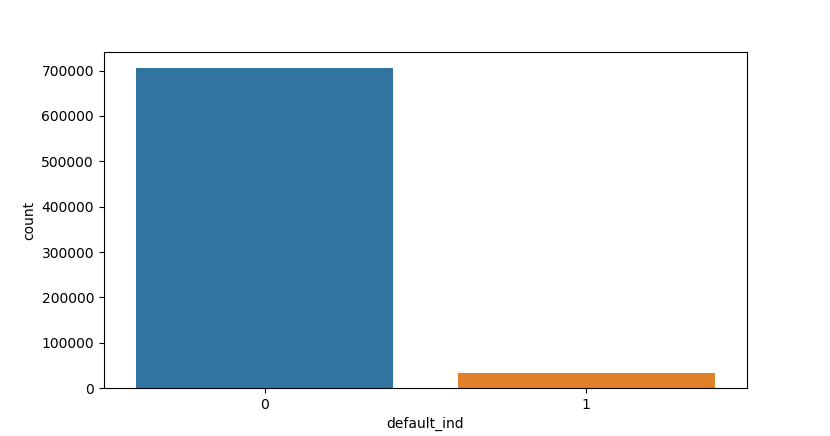

In [287]:
%matplotlib notebook
sns.countplot(df['default_ind']);

As can be seen, the predictor is heavily skewed. For such problems, we will better off using a tree based, ensemble method like Random Forest classifier.

## 2. Model Building
### 2.1 Creating train and test splits
As advised in the problem statement, we will divide data into train ( June 2007 - May 2015 ) and test ( June 2015 - Dec 2015 ) data sets.

In [337]:
# updating the list of numeric and categorical columns once again
num = []
cat = []

for e in df.iloc[:, 3:]:
    if (df[e].dtype == 'int64') | (df[e].dtype == 'float64'):
        num.append(e)
    else:
        cat.append(e)
        
print(num, cat, sep = '\n\n')

['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'out_prncp', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'days_early_cr_line', 'days_latest_cr_line']

['investor_diff', 'grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status']


In [339]:
# creating dummy variables
df = pd.get_dummies(df, columns = cat, drop_first = True)
df.shape

(738935, 36)

In [375]:
# creating train and test sets
train = df[df['issue_d'] < '2015-01-06']
test = df[df['issue_d'] >= '2015-01-06']
print(train.shape, test.shape, sep = '\n')

(504868, 36)
(234067, 36)


In [498]:
# creating X and y sets for each
train_X = train.iloc[:, 3:]
train_y = train.iloc[:, 0]

test_X = test.iloc[:, 3:]
test_y = test.iloc[:, 0]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, sep = '\n')

(504868, 33)
(504868,)
(234067, 33)
(234067,)


### 2.2 Base Model - Logistic Regression

In [455]:
import statsmodels.api as sm #library for Logistic Regression
mod_logit = sm.Logit(train_y, train_X).fit()
mod_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.097009
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.603      
Dependent Variable:        default_ind            AIC:                    98019.8055 
Date:                      2019-05-06 22:16       BIC:                    98387.1633 
No. Observations:          504868                 Log-Likelihood:         -48977.    
Df Model:                  32                     LL-Null:                -1.2351e+05
Df Residuals:              504835                 LLR p-value:            0.0000     
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            11.0000                                                   
-------------------------------------------------------------------------------------
                                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------
loan_amnt                            0.0003   0.0000   28.6853 0.0000  0.0003  0.0003
term                                -0.0065   0.0021   -3.1600 0.0016 -0.0106 -0.0025
int_rate                             0.0614   0.0074    8.2730 0.0000  0.0468  0.0759
installment                         -0.0049   0.0003  -16.1636 0.0000 -0.0055 -0.0043
emp_length                          -0.0082   0.0025   -3.2673 0.0011 -0.0131 -0.0033
annual_inc                          -0.0000   0.0000  -12.8386 0.0000 -0.0000 -0.0000
dti                                  0.0122   0.0012   10.3016 0.0000  0.0098  0.0145
delinq_2yrs                         -0.0004   0.0099   -0.0375 0.9701 -0.0199  0.0191
inq_last_6mths                       0.0882   0.0083   10.5828 0.0000  0.0719  0.1045
open_acc                             0.0057   0.0020    2.8081 0.0050  0.0017  0.0096
pub_rec                             -0.0515   0.0175   -2.9365 0.0033 -0.0859 -0.0171
revol_util                          -0.0007   0.0004   -1.5897 0.1119 -0.0015  0.0002
out_prncp                           -0.0008   0.0000 -140.8948 0.0000 -0.0009 -0.0008
last_pymnt_amnt                     -0.0013   0.0000  -83.1768 0.0000 -0.0014 -0.0013
tot_coll_amt                        -0.0000   0.0000   -1.4439 0.1488 -0.0000  0.0000
tot_cur_bal                         -0.0000   0.0000   -8.4437 0.0000 -0.0000 -0.0000
total_rev_hi_lim                    -0.0000   0.0000   -9.9609 0.0000 -0.0000 -0.0000
days_early_cr_line                  -0.0000   0.0000  -11.5688 0.0000 -0.0000 -0.0000
days_latest_cr_line                 -0.0020   0.0000  -72.3107 0.0000 -0.0020 -0.0019
investor_diff_same                  -0.3235   0.0293  -11.0489 0.0000 -0.3808 -0.2661
grade_B                              0.2158   0.0438    4.9274 0.0000  0.1299  0.3016
grade_C                              0.5453   0.0593    9.1984 0.0000  0.4291  0.6615
grade_D                              0.7121   0.0778    9.1591 0.0000  0.5597  0.8645
grade_E                              0.8957   0.0981    9.1299 0.0000  0.7034  1.0879
grade_Other                          0.9725   0.1222    7.9560 0.0000  0.7329  1.2120
home_ownership_OWN                  -0.2052   0.0324   -6.3244 0.0000 -0.2688 -0.1416
home_ownership_RENT                 -0.1264   0.0216   -5.8400 0.0000 -0.1688 -0.0840
verification_status_Source Verified  0.1801   0.0219    8.2352 0.0000  0.1373  0.2230
verification_status_Verified         0.0941   0.0213    4.4151 0.0000  0.0523  0.1359
purpose_debt_consolidation          -0.0269   0.0213   -1.2606 0.2074 -0.0686  0.0149
purpose_home_improvement            -0.2749   0.0433   -6.3475 0.0000 -0.3598 -0.1900
purpose_other                       -0.4191   0.0297  -14.1085 0.0000 -0.4774 -0.3609
initial_list_status_w               -0.0013   0.0182   -0.0714 0.9431 -0.0369  0.0343
===============================

In [499]:
print(train_X.shape, test_X.shape, sep = '\n')
train_X = train_X.drop(['delinq_2yrs', 'revol_util', 'tot_coll_amt', 'initial_list_status_w'], axis = 1)
test_X = test_X.drop(['delinq_2yrs', 'revol_util', 'tot_coll_amt', 'initial_list_status_w'], axis = 1)
print(train_X.shape, test_X.shape, sep = '\n')

(504868, 33)
(234067, 33)
(504868, 29)
(234067, 29)


In [457]:
mod_logit = sm.Logit(train_y, train_X).fit()
mod_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.097015
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.603      
Dependent Variable:        default_ind            AIC:                    98017.1490 
Date:                      2019-05-06 22:17       BIC:                    98339.9785 
No. Observations:          504868                 Log-Likelihood:         -48980.    
Df Model:                  28                     LL-Null:                -1.2351e+05
Df Residuals:              504839                 LLR p-value:            0.0000     
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            11.0000                                                   
-------------------------------------------------------------------------------------
                                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------
loan_amnt                            0.0003   0.0000   28.9266 0.0000  0.0003  0.0003
term                                -0.0067   0.0021   -3.2635 0.0011 -0.0108 -0.0027
int_rate                             0.0596   0.0073    8.1454 0.0000  0.0452  0.0739
installment                         -0.0049   0.0003  -16.3816 0.0000 -0.0055 -0.0044
emp_length                          -0.0083   0.0025   -3.3262 0.0009 -0.0132 -0.0034
annual_inc                          -0.0000   0.0000  -13.2578 0.0000 -0.0000 -0.0000
dti                                  0.0117   0.0011   10.2282 0.0000  0.0095  0.0140
inq_last_6mths                       0.0906   0.0082   11.0564 0.0000  0.0745  0.1066
open_acc                             0.0061   0.0020    3.0870 0.0020  0.0022  0.0100
pub_rec                             -0.0490   0.0174   -2.8203 0.0048 -0.0831 -0.0150
out_prncp                           -0.0008   0.0000 -141.1302 0.0000 -0.0009 -0.0008
last_pymnt_amnt                     -0.0013   0.0000  -83.1781 0.0000 -0.0014 -0.0013
tot_cur_bal                         -0.0000   0.0000   -8.7198 0.0000 -0.0000 -0.0000
total_rev_hi_lim                    -0.0000   0.0000   -9.8566 0.0000 -0.0000 -0.0000
days_early_cr_line                  -0.0000   0.0000  -11.8558 0.0000 -0.0000 -0.0000
days_latest_cr_line                 -0.0020   0.0000  -72.7872 0.0000 -0.0020 -0.0019
investor_diff_same                  -0.3240   0.0288  -11.2465 0.0000 -0.3805 -0.2676
grade_B                              0.2137   0.0437    4.8848 0.0000  0.1279  0.2994
grade_C                              0.5450   0.0592    9.1994 0.0000  0.4289  0.6611
grade_D                              0.7153   0.0777    9.2105 0.0000  0.5631  0.8676
grade_E                              0.9036   0.0979    9.2306 0.0000  0.7117  1.0954
grade_Other                          0.9856   0.1219    8.0869 0.0000  0.7467  1.2244
home_ownership_OWN                  -0.2043   0.0324   -6.2977 0.0000 -0.2678 -0.1407
home_ownership_RENT                 -0.1270   0.0216   -5.8732 0.0000 -0.1694 -0.0846
verification_status_Source Verified  0.1802   0.0219    8.2404 0.0000  0.1373  0.2230
verification_status_Verified         0.0948   0.0213    4.4488 0.0000  0.0530  0.1365
purpose_debt_consolidation          -0.0242   0.0212   -1.1413 0.2537 -0.0658  0.0174
purpose_home_improvement            -0.2691   0.0431   -6.2435 0.0000 -0.3536 -0.1846
purpose_other                       -0.4124   0.0293  -14.0635 0.0000 -0.4699 -0.3549
=====================================================================================

"""

This is a good model on the surface. We have a Pseudo R-squared of 0.6 and no insignificant variables. We will now see it's confusion matrix and other parameters to see how the model has performed.

In [458]:
# predictions on test set
pred = mod_logit.predict(test_X)
pred = round(pred)
pred.head()

452272    0.0
452273    0.0
452277    0.0
452279    0.0
452280    0.0
dtype: float64

In [459]:
# confusion matrix
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(test_y, pred)
print(cm)
print("\n\nConfusion Matrix - Stats\n>>>>>>>>>>>>\n")
cm.print_stats()

Predicted   False  True  __all__
Actual                          
False      233483   367   233850
True           75   142      217
__all__    233558   509   234067


Confusion Matrix - Stats
>>>>>>>>>>>>

population: 234067
P: 217
N: 233850
PositiveTest: 509
NegativeTest: 233558
TP: 142
TN: 233483
FP: 367
FN: 75
TPR: 0.6543778801843319
TNR: 0.9984306179174685
PPV: 0.27897838899803534
NPV: 0.9996788806206596
FPR: 0.0015693820825315374
FDR: 0.7210216110019646
FNR: 0.3456221198156682
ACC: 0.9981116517920082
F1_score: 0.39118457300275483
MCC: 0.426508890487559
informedness: 0.6528084981018003
markedness: 0.27865726961869486
prevalence: 0.0009270849799416406
LRP: 416.96530594306813
LRN: 0.34616538556937343
DOR: 1204.526285195277
FOR: 0.00032111937934046364


In [464]:
# stats
recall = []
precision = []
accuracy = []

from sklearn import metrics
# recall
recall.append(round(metrics.recall_score(test_y, pred), 3))

# precision
precision.append(round(metrics.precision_score(test_y, pred), 3))

# accuracy
accuracy.append(round(metrics.accuracy_score(test_y, pred), 3))

From the above tables and statistics, we can conclude the following - 
> 1. Our model accuracy is over 99% but that's solely due to the fact that our predictor is heavily skewed. 
> 2. The true performance of our model is indicated by the sensitivity (TPR) which is around 0.65 or 65%.

We will need to find ways to improve our sensitivity. We made a note earlier - try to build models without loan_amnt and/or installment to see the change. Let's try that now.

### Model Nos. 2 - without *loan_amnt*

In [468]:
mod_logit_2 = sm.Logit(train_y, train_X.iloc[:, 1:]).fit()
mod_logit_2.summary2()

Optimization terminated successfully.
         Current function value: 0.097920
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.600      
Dependent Variable:        default_ind            AIC:                    98929.1390 
Date:                      2019-05-06 22:25       BIC:                    99240.8365 
No. Observations:          504868                 Log-Likelihood:         -49437.    
Df Model:                  27                     LL-Null:                -1.2351e+05
Df Residuals:              504840                 LLR p-value:            0.0000     
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            11.0000                                                   
-------------------------------------------------------------------------------------
                                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------
term                                 0.0454   0.0011   42.0836 0.0000  0.0433  0.0475
int_rate                            -0.0553   0.0062   -8.9678 0.0000 -0.0674 -0.0432
installment                          0.0038   0.0000   78.8945 0.0000  0.0037  0.0039
emp_length                          -0.0137   0.0025   -5.5369 0.0000 -0.0186 -0.0089
annual_inc                          -0.0000   0.0000  -14.9208 0.0000 -0.0000 -0.0000
dti                                  0.0081   0.0011    7.1152 0.0000  0.0059  0.0103
inq_last_6mths                       0.0844   0.0082   10.2911 0.0000  0.0683  0.1005
open_acc                             0.0002   0.0020    0.0896 0.9286 -0.0037  0.0040
pub_rec                             -0.0697   0.0177   -3.9465 0.0001 -0.1043 -0.0351
out_prncp                           -0.0009   0.0000 -147.4768 0.0000 -0.0009 -0.0009
last_pymnt_amnt                     -0.0014   0.0000  -84.8286 0.0000 -0.0014 -0.0013
tot_cur_bal                         -0.0000   0.0000   -8.6683 0.0000 -0.0000 -0.0000
total_rev_hi_lim                    -0.0000   0.0000   -7.9767 0.0000 -0.0000 -0.0000
days_early_cr_line                  -0.0000   0.0000  -14.4289 0.0000 -0.0001 -0.0000
days_latest_cr_line                 -0.0020   0.0000  -75.6089 0.0000 -0.0021 -0.0020
investor_diff_same                  -0.5386   0.0272  -19.7808 0.0000 -0.5920 -0.4853
grade_B                              0.3321   0.0421    7.8806 0.0000  0.2495  0.4147
grade_C                              0.9422   0.0564   16.6989 0.0000  0.8316  1.0528
grade_D                              1.3591   0.0733   18.5416 0.0000  1.2155  1.5028
grade_E                              1.7982   0.0919   19.5674 0.0000  1.6181  1.9783
grade_Other                          2.0951   0.1148   18.2474 0.0000  1.8701  2.3201
home_ownership_OWN                  -0.2699   0.0322   -8.3853 0.0000 -0.3329 -0.2068
home_ownership_RENT                 -0.2122   0.0213   -9.9745 0.0000 -0.2539 -0.1705
verification_status_Source Verified  0.1838   0.0218    8.4166 0.0000  0.1410  0.2266
verification_status_Verified         0.1283   0.0212    6.0522 0.0000  0.0868  0.1699
purpose_debt_consolidation          -0.0826   0.0209   -3.9574 0.0001 -0.1235 -0.0417
purpose_home_improvement            -0.3544   0.0424   -8.3623 0.0000 -0.4374 -0.2713
purpose_other                       -0.4892   0.0291  -16.8315 0.0000 -0.5462 -0.4322
=====================================================================================

"""

In [501]:
train_X_2 = train_X.drop(['loan_amnt', 'open_acc'], axis = 1)
test_X_2 = test_X.drop(['loan_amnt', 'open_acc'], axis = 1)

# these are the train and test sets for best model
X_train = train_X_2
X_test = test_X_2

mod_logit_2 = sm.Logit(train_y, train_X_2).fit()
mod_logit_2.summary2()

Optimization terminated successfully.
         Current function value: 0.097920
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.600      
Dependent Variable:        default_ind            AIC:                    98927.1470 
Date:                      2019-05-06 23:05       BIC:                    99227.7125 
No. Observations:          504868                 Log-Likelihood:         -49437.    
Df Model:                  26                     LL-Null:                -1.2351e+05
Df Residuals:              504841                 LLR p-value:            0.0000     
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            11.0000                                                   
-------------------------------------------------------------------------------------
                                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------
term                                 0.0454   0.0011   42.1727 0.0000  0.0433  0.0475
int_rate                            -0.0553   0.0062   -8.9789 0.0000 -0.0673 -0.0432
installment                          0.0038   0.0000   78.8956 0.0000  0.0037  0.0039
emp_length                          -0.0137   0.0025   -5.5402 0.0000 -0.0186 -0.0089
annual_inc                          -0.0000   0.0000  -14.9723 0.0000 -0.0000 -0.0000
dti                                  0.0081   0.0011    7.5081 0.0000  0.0060  0.0102
inq_last_6mths                       0.0845   0.0082   10.3620 0.0000  0.0685  0.1004
pub_rec                             -0.0697   0.0177   -3.9456 0.0001 -0.1043 -0.0351
out_prncp                           -0.0009   0.0000 -147.5331 0.0000 -0.0009 -0.0009
last_pymnt_amnt                     -0.0014   0.0000  -84.8282 0.0000 -0.0014 -0.0013
tot_cur_bal                         -0.0000   0.0000   -8.7012 0.0000 -0.0000 -0.0000
total_rev_hi_lim                    -0.0000   0.0000   -8.2467 0.0000 -0.0000 -0.0000
days_early_cr_line                  -0.0000   0.0000  -14.4353 0.0000 -0.0001 -0.0000
days_latest_cr_line                 -0.0020   0.0000  -75.6110 0.0000 -0.0021 -0.0020
investor_diff_same                  -0.5385   0.0272  -19.7980 0.0000 -0.5918 -0.4852
grade_B                              0.3321   0.0421    7.8803 0.0000  0.2495  0.4147
grade_C                              0.9421   0.0564   16.7025 0.0000  0.8315  1.0526
grade_D                              1.3589   0.0732   18.5524 0.0000  1.2153  1.5024
grade_E                              1.7978   0.0918   19.5846 0.0000  1.6179  1.9777
grade_Other                          2.0946   0.1147   18.2661 0.0000  1.8698  2.3193
home_ownership_OWN                  -0.2699   0.0322   -8.3851 0.0000 -0.3329 -0.2068
home_ownership_RENT                 -0.2121   0.0213   -9.9776 0.0000 -0.2538 -0.1704
verification_status_Source Verified  0.1838   0.0218    8.4163 0.0000  0.1410  0.2266
verification_status_Verified         0.1283   0.0212    6.0520 0.0000  0.0867  0.1698
purpose_debt_consolidation          -0.0826   0.0209   -3.9564 0.0001 -0.1235 -0.0417
purpose_home_improvement            -0.3544   0.0424   -8.3626 0.0000 -0.4374 -0.2713
purpose_other                       -0.4893   0.0291  -16.8351 0.0000 -0.5462 -0.4323
=====================================================================================

"""

In [470]:
# predictions on test set
pred = mod_logit_2.predict(test_X_2)
pred = round(pred)
pred.head()

452272    0.0
452273    0.0
452277    0.0
452279    0.0
452280    0.0
dtype: float64

In [471]:
# confusion matrix
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(test_y, pred)
print(cm)
print("\n\nConfusion Matrix - Stats\n>>>>>>>>>>>>\n")
cm.print_stats()

Predicted   False  True  __all__
Actual                          
False      233468   382   233850
True           67   150      217
__all__    233535   532   234067


Confusion Matrix - Stats
>>>>>>>>>>>>

population: 234067
P: 217
N: 233850
PositiveTest: 532
NegativeTest: 233535
TP: 150
TN: 233468
FP: 382
FN: 67
TPR: 0.6912442396313364
TNR: 0.9983664742356211
PPV: 0.2819548872180451
NPV: 0.9997131051020189
FPR: 0.0016335257643788753
FDR: 0.7180451127819549
FNR: 0.3087557603686636
ACC: 0.9980817458249134
F1_score: 0.40053404539385845
MCC: 0.44072810808628043
informedness: 0.6896107138669576
markedness: 0.281667992320064
prevalence: 0.0009270849799416406
LRP: 423.1609042874032
LRN: 0.3092609460920211
DOR: 1368.2972571696491
FOR: 0.0002868948979810307


In [472]:
# recall
recall.append(round(metrics.recall_score(test_y, pred), 3))

# precision
precision.append(round(metrics.precision_score(test_y, pred), 3))

# accuracy
accuracy.append(round(metrics.accuracy_score(test_y, pred), 3))

Removing **loan_amnt** from our dataset has surprisingly improved our Sensitivity by almost 4% taking it up to 69%. Let's see what effect it would have if we drop **installment** instead and keep **loan_amnt**.

### Model No. 3 - without *installment*

In [474]:
train_X_2 = train_X.drop(['installment'], axis=1)
mod_logit_3 = sm.Logit(train_y, train_X_2).fit()
mod_logit_3.summary2()

Optimization terminated successfully.
         Current function value: 0.097291
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.602      
Dependent Variable:        default_ind            AIC:                    98294.2358 
Date:                      2019-05-06 22:26       BIC:                    98605.9333 
No. Observations:          504868                 Log-Likelihood:         -49119.    
Df Model:                  27                     LL-Null:                -1.2351e+05
Df Residuals:              504840                 LLR p-value:            0.0000     
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            11.0000                                                   
-------------------------------------------------------------------------------------
                                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------
loan_amnt                            0.0001   0.0000   81.9832 0.0000  0.0001  0.0001
term                                 0.0218   0.0011   19.4032 0.0000  0.0196  0.0240
int_rate                            -0.0047   0.0062   -0.7594 0.4476 -0.0168  0.0074
emp_length                          -0.0112   0.0025   -4.5132 0.0000 -0.0161 -0.0063
annual_inc                          -0.0000   0.0000  -15.0391 0.0000 -0.0000 -0.0000
dti                                  0.0097   0.0011    8.5233 0.0000  0.0075  0.0120
inq_last_6mths                       0.0887   0.0082   10.8053 0.0000  0.0726  0.1048
open_acc                             0.0029   0.0020    1.4886 0.1366 -0.0009  0.0068
pub_rec                             -0.0574   0.0176   -3.2681 0.0011 -0.0918 -0.0230
out_prncp                           -0.0009   0.0000 -145.0042 0.0000 -0.0009 -0.0009
last_pymnt_amnt                     -0.0014   0.0000  -83.7019 0.0000 -0.0014 -0.0013
tot_cur_bal                         -0.0000   0.0000   -8.6366 0.0000 -0.0000 -0.0000
total_rev_hi_lim                    -0.0000   0.0000   -9.3287 0.0000 -0.0000 -0.0000
days_early_cr_line                  -0.0000   0.0000  -13.2668 0.0000 -0.0001 -0.0000
days_latest_cr_line                 -0.0020   0.0000  -74.4582 0.0000 -0.0021 -0.0020
investor_diff_same                  -0.4315   0.0277  -15.5566 0.0000 -0.4859 -0.3771
grade_B                              0.2771   0.0428    6.4703 0.0000  0.1932  0.3610
grade_C                              0.7610   0.0571   13.3210 0.0000  0.6490  0.8730
grade_D                              1.0673   0.0741   14.4085 0.0000  0.9221  1.2125
grade_E                              1.3938   0.0927   15.0307 0.0000  1.2121  1.5756
grade_Other                          1.5986   0.1156   13.8265 0.0000  1.3720  1.8252
home_ownership_OWN                  -0.2385   0.0323   -7.3774 0.0000 -0.3018 -0.1751
home_ownership_RENT                 -0.1711   0.0214   -7.9922 0.0000 -0.2130 -0.1291
verification_status_Source Verified  0.1747   0.0219    7.9818 0.0000  0.1318  0.2176
verification_status_Verified         0.1012   0.0213    4.7496 0.0000  0.0594  0.1429
purpose_debt_consolidation          -0.0556   0.0210   -2.6441 0.0082 -0.0968 -0.0144
purpose_home_improvement            -0.3079   0.0428   -7.1949 0.0000 -0.3917 -0.2240
purpose_other                       -0.4393   0.0292  -15.0237 0.0000 -0.4966 -0.3820
=====================================================================================

"""

In [475]:
train_X_2 = train_X.drop(['installment', 'int_rate', 'open_acc'], axis=1)
test_X_2 = test_X.drop(['installment', 'int_rate', 'open_acc'], axis=1)
mod_logit_3 = sm.Logit(train_y, train_X_2).fit()
mod_logit_3.summary2()

Optimization terminated successfully.
         Current function value: 0.097294
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.602      
Dependent Variable:        default_ind            AIC:                    98292.9013 
Date:                      2019-05-06 22:26       BIC:                    98582.3347 
No. Observations:          504868                 Log-Likelihood:         -49120.    
Df Model:                  25                     LL-Null:                -1.2351e+05
Df Residuals:              504842                 LLR p-value:            0.0000     
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            11.0000                                                   
-------------------------------------------------------------------------------------
                                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------
loan_amnt                            0.0001   0.0000   81.9835 0.0000  0.0001  0.0001
term                                 0.0216   0.0010   21.1050 0.0000  0.0196  0.0236
emp_length                          -0.0114   0.0025   -4.6200 0.0000 -0.0163 -0.0066
annual_inc                          -0.0000   0.0000  -15.0800 0.0000 -0.0000 -0.0000
dti                                  0.0101   0.0011    9.4341 0.0000  0.0080  0.0123
inq_last_6mths                       0.0894   0.0081   11.0232 0.0000  0.0735  0.1053
pub_rec                             -0.0567   0.0175   -3.2356 0.0012 -0.0911 -0.0224
out_prncp                           -0.0009   0.0000 -145.2744 0.0000 -0.0009 -0.0009
last_pymnt_amnt                     -0.0014   0.0000  -84.1502 0.0000 -0.0014 -0.0013
tot_cur_bal                         -0.0000   0.0000   -8.5411 0.0000 -0.0000 -0.0000
total_rev_hi_lim                    -0.0000   0.0000   -9.2659 0.0000 -0.0000 -0.0000
days_early_cr_line                  -0.0000   0.0000  -13.2985 0.0000 -0.0001 -0.0000
days_latest_cr_line                 -0.0020   0.0000  -83.4779 0.0000 -0.0021 -0.0020
investor_diff_same                  -0.4339   0.0270  -16.0586 0.0000 -0.4868 -0.3809
grade_B                              0.2572   0.0311    8.2732 0.0000  0.1963  0.3182
grade_C                              0.7274   0.0327   22.2379 0.0000  0.6633  0.7915
grade_D                              1.0196   0.0357   28.5942 0.0000  0.9497  1.0895
grade_E                              1.3330   0.0444   30.0009 0.0000  1.2459  1.4201
grade_Other                          1.5232   0.0583   26.1402 0.0000  1.4090  1.6374
home_ownership_OWN                  -0.2403   0.0322   -7.4644 0.0000 -0.3033 -0.1772
home_ownership_RENT                 -0.1723   0.0211   -8.1643 0.0000 -0.2137 -0.1309
verification_status_Source Verified  0.1742   0.0219    7.9608 0.0000  0.1313  0.2171
verification_status_Verified         0.1000   0.0213    4.6977 0.0000  0.0583  0.1417
purpose_debt_consolidation          -0.0566   0.0209   -2.7054 0.0068 -0.0976 -0.0156
purpose_home_improvement            -0.3101   0.0427   -7.2634 0.0000 -0.3938 -0.2264
purpose_other                       -0.4428   0.0290  -15.2956 0.0000 -0.4996 -0.3861
=====================================================================================

"""

In [476]:
# predictions on test set
pred = mod_logit_3.predict(test_X_2)
pred = round(pred)
pred.head()

452272    0.0
452273    0.0
452277    0.0
452279    0.0
452280    0.0
dtype: float64

In [477]:
# confusion matrix
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(test_y, pred)
print(cm)
print("\n\nConfusion Matrix - Stats\n>>>>>>>>>>>>\n")
cm.print_stats()

Predicted   False  True  __all__
Actual                          
False      233478   372   233850
True           69   148      217
__all__    233547   520   234067


Confusion Matrix - Stats
>>>>>>>>>>>>

population: 234067
P: 217
N: 233850
PositiveTest: 520
NegativeTest: 233547
TP: 148
TN: 233478
FP: 372
FN: 69
TPR: 0.6820276497695853
TNR: 0.998409236690186
PPV: 0.2846153846153846
NPV: 0.9997045562563424
FPR: 0.0015907633098139833
FDR: 0.7153846153846154
FNR: 0.31797235023041476
ACC: 0.9981159240730219
F1_score: 0.4016282225237449
MCC: 0.43984289845942065
informedness: 0.6804368864597712
markedness: 0.28431994087172696
prevalence: 0.0009270849799416406
LRP: 428.74238144789655
LRN: 0.3184789748986307
DOR: 1346.2187938288919
FOR: 0.00029544374365759356


In [478]:
# recall
recall.append(round(metrics.recall_score(test_y, pred), 3))

# precision
precision.append(round(metrics.precision_score(test_y, pred), 3))

# accuracy
accuracy.append(round(metrics.accuracy_score(test_y, pred), 3))

Removing **installment** did improve our model's sensitivity but not as much as when we removed **loan_amnt**. Now, let's try and remove both **installment** and **loan_amnt**.

### Model No. 4 - Without *installment* and *loan_amnt*

In [479]:
train_X_2 = train_X.drop(['loan_amnt', 'installment'], axis = 1)
mod_logit_4 = sm.Logit(train_y, train_X_2).fit()
mod_logit_4.summary2()

Optimization terminated successfully.
         Current function value: 0.105201
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.570      
Dependent Variable:        default_ind            AIC:                    106278.7487
Date:                      2019-05-06 22:27       BIC:                    106579.3141
No. Observations:          504868                 Log-Likelihood:         -53112.    
Df Model:                  26                     LL-Null:                -1.2351e+05
Df Residuals:              504841                 LLR p-value:            0.0000     
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            11.0000                                                   
-------------------------------------------------------------------------------------
                                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------
term                                 0.0511   0.0010   50.1387 0.0000  0.0491  0.0531
int_rate                            -0.0006   0.0058   -0.1070 0.9148 -0.0120  0.0108
emp_length                          -0.0119   0.0024   -5.0437 0.0000 -0.0165 -0.0073
annual_inc                           0.0000   0.0000    7.5737 0.0000  0.0000  0.0000
dti                                  0.0071   0.0010    6.7530 0.0000  0.0050  0.0091
inq_last_6mths                       0.0474   0.0077    6.1264 0.0000  0.0322  0.0625
open_acc                             0.0054   0.0018    3.0096 0.0026  0.0019  0.0089
pub_rec                             -0.1582   0.0171   -9.2345 0.0000 -0.1918 -0.1246
out_prncp                           -0.0010   0.0000 -148.3950 0.0000 -0.0010 -0.0009
last_pymnt_amnt                     -0.0011   0.0000 -100.5911 0.0000 -0.0012 -0.0011
tot_cur_bal                         -0.0000   0.0000   -8.9566 0.0000 -0.0000 -0.0000
total_rev_hi_lim                     0.0000   0.0000    5.0784 0.0000  0.0000  0.0000
days_early_cr_line                  -0.0000   0.0000  -12.5681 0.0000 -0.0000 -0.0000
days_latest_cr_line                 -0.0019   0.0000  -74.0936 0.0000 -0.0019 -0.0018
investor_diff_same                  -0.8618   0.0259  -33.2711 0.0000 -0.9126 -0.8110
grade_B                              0.1838   0.0404    4.5470 0.0000  0.1046  0.2630
grade_C                              0.6753   0.0538   12.5567 0.0000  0.5699  0.7807
grade_D                              1.0058   0.0697   14.4249 0.0000  0.8691  1.1425
grade_E                              1.3875   0.0870   15.9402 0.0000  1.2169  1.5582
grade_Other                          1.5877   0.1080   14.6958 0.0000  1.3759  1.7994
home_ownership_OWN                  -0.3007   0.0304   -9.8799 0.0000 -0.3604 -0.2411
home_ownership_RENT                 -0.2568   0.0199  -12.8814 0.0000 -0.2959 -0.2178
verification_status_Source Verified  0.4494   0.0206   21.8604 0.0000  0.4092  0.4897
verification_status_Verified         0.5116   0.0197   26.0131 0.0000  0.4731  0.5502
purpose_debt_consolidation          -0.0844   0.0200   -4.2182 0.0000 -0.1236 -0.0452
purpose_home_improvement            -0.5811   0.0396  -14.6704 0.0000 -0.6587 -0.5035
purpose_other                       -0.9279   0.0274  -33.8376 0.0000 -0.9816 -0.8742
=====================================================================================

"""

In [480]:
train_X_2 = train_X.drop(['loan_amnt', 'installment', 'int_rate'], axis = 1)
test_X_2 = test_X.drop(['loan_amnt', 'installment', 'int_rate'], axis = 1)
mod_logit_4 = sm.Logit(train_y, train_X_2).fit()
mod_logit_4.summary2()

Optimization terminated successfully.
         Current function value: 0.105201
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
=====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.570      
Dependent Variable:        default_ind            AIC:                    106276.7602
Date:                      2019-05-06 22:27       BIC:                    106566.1935
No. Observations:          504868                 Log-Likelihood:         -53112.    
Df Model:                  25                     LL-Null:                -1.2351e+05
Df Residuals:              504842                 LLR p-value:            0.0000     
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            11.0000                                                   
-------------------------------------------------------------------------------------
                                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------------
term                                 0.0511   0.0009   55.2451 0.0000  0.0493  0.0529
emp_length                          -0.0119   0.0023   -5.0719 0.0000 -0.0165 -0.0073
annual_inc                           0.0000   0.0000    7.5740 0.0000  0.0000  0.0000
dti                                  0.0071   0.0010    6.7787 0.0000  0.0050  0.0091
inq_last_6mths                       0.0473   0.0077    6.1514 0.0000  0.0322  0.0624
open_acc                             0.0054   0.0018    3.0088 0.0026  0.0019  0.0089
pub_rec                             -0.1582   0.0171   -9.2365 0.0000 -0.1918 -0.1247
out_prncp                           -0.0010   0.0000 -148.6402 0.0000 -0.0010 -0.0009
last_pymnt_amnt                     -0.0011   0.0000 -101.2940 0.0000 -0.0012 -0.0011
tot_cur_bal                         -0.0000   0.0000   -8.9614 0.0000 -0.0000 -0.0000
total_rev_hi_lim                     0.0000   0.0000    5.0971 0.0000  0.0000  0.0000
days_early_cr_line                  -0.0000   0.0000  -12.6077 0.0000 -0.0000 -0.0000
days_latest_cr_line                 -0.0019   0.0000  -83.0397 0.0000 -0.0019 -0.0018
investor_diff_same                  -0.8624   0.0253  -34.1550 0.0000 -0.9119 -0.8129
grade_B                              0.1808   0.0293    6.1736 0.0000  0.1234  0.2382
grade_C                              0.6706   0.0306   21.9279 0.0000  0.6107  0.7305
grade_D                              0.9993   0.0333   30.0476 0.0000  0.9341  1.0644
grade_E                              1.3793   0.0412   33.4998 0.0000  1.2986  1.4600
grade_Other                          1.5777   0.0536   29.4467 0.0000  1.4726  1.6827
home_ownership_OWN                  -0.3010   0.0303   -9.9288 0.0000 -0.3604 -0.2416
home_ownership_RENT                 -0.2572   0.0196  -13.0914 0.0000 -0.2957 -0.2187
verification_status_Source Verified  0.4494   0.0206   21.8607 0.0000  0.4091  0.4897
verification_status_Verified         0.5116   0.0197   26.0257 0.0000  0.4730  0.5501
purpose_debt_consolidation          -0.0846   0.0199   -4.2547 0.0000 -0.1236 -0.0456
purpose_home_improvement            -0.5814   0.0395  -14.7147 0.0000 -0.6588 -0.5040
purpose_other                       -0.9283   0.0271  -34.2211 0.0000 -0.9815 -0.8752
=====================================================================================

"""

In [481]:
# predictions on test set
pred = mod_logit_4.predict(test_X_2)
pred = round(pred)
pred.head()

452272    0.0
452273    0.0
452277    0.0
452279    0.0
452280    0.0
dtype: float64

In [482]:
# confusion matrix
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(test_y, pred)
print(cm)
print("\n\nConfusion Matrix - Stats\n>>>>>>>>>>>>\n")
cm.print_stats()

Predicted   False  True  __all__
Actual                          
False      233166   684   233850
True           73   144      217
__all__    233239   828   234067


Confusion Matrix - Stats
>>>>>>>>>>>>

population: 234067
P: 217
N: 233850
PositiveTest: 828
NegativeTest: 233239
TP: 144
TN: 233166
FP: 684
FN: 73
TPR: 0.663594470046083
TNR: 0.9970750481077614
PPV: 0.17391304347826086
NPV: 0.9996870163223132
FPR: 0.0029249518922386144
FDR: 0.8260869565217391
FNR: 0.33640552995391704
ACC: 0.9967658832727382
F1_score: 0.2755980861244019
MCC: 0.3386624689272843
informedness: 0.6606695181538442
markedness: 0.17360005980057402
prevalence: 0.0009270849799416406
LRP: 226.87363570215862
LRN: 0.33739238645309994
DOR: 672.4325883201154
FOR: 0.00031298367768683625


In [483]:
# recall
recall.append(round(metrics.recall_score(test_y, pred), 3))

# precision
precision.append(round(metrics.precision_score(test_y, pred), 3))

# accuracy
accuracy.append(round(metrics.accuracy_score(test_y, pred), 3))

As can be seen, there's only a 1% improvement in TPR from base model when removing both **loan_amnt** as well as **installment**. We can hence say that the best model, yet, has been built when **loan_amnt** was not included. Which is also quite logical as installments start getting delayed and then stop altogether (hence, default) because clients are having a difficulty managing their income against installment rather than the entire loan amount.

Now, let's see how a different, ensemble classifier performs on this dataset.

### Model Nos. 5, 6 and 7 - Random Forest

In [484]:
# creating X and y sets again for RF
train_X = train.iloc[:, 3:]
train_y = train.iloc[:, 0]

test_X = test.iloc[:, 3:]
test_y = test.iloc[:, 0]

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, sep = '\n')

(504868, 33)
(504868,)
(234067, 33)
(234067,)


In [485]:
from sklearn.ensemble import RandomForestClassifier 
mod_rf_5 = RandomForestClassifier().fit(train_X, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [486]:
# predictions on test set
pred = mod_rf_5.predict(test_X)
pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [487]:
# confusion matrix
cm = ConfusionMatrix(list(test_y), list(pred))
print(cm)
print("\n\nConfusion Matrix - Stats\n>>>>>>>>>>>>\n")
cm.print_stats()

Predicted   False  True  __all__
Actual                          
False      230711  3139   233850
True           77   140      217
__all__    230788  3279   234067


Confusion Matrix - Stats
>>>>>>>>>>>>

population: 234067
P: 217
N: 233850
PositiveTest: 3279
NegativeTest: 230788
TP: 140
TN: 230711
FP: 3139
FN: 77
TPR: 0.6451612903225806
TNR: 0.9865768655120803
PPV: 0.04269594388533089
NPV: 0.9996663604693485
FPR: 0.013423134487919607
FDR: 0.9573040561146691
FNR: 0.3548387096774194
ACC: 0.9862603442604041
F1_score: 0.08009153318077804
MCC: 0.1635905988433681
informedness: 0.6317381558346611
markedness: 0.04236230435467947
prevalence: 0.0009270849799416406
LRP: 48.06338570944106
LRN: 0.3596665623141702
DOR: 133.63317790842478
FOR: 0.000333639530651507


In [488]:
# recall
recall.append(round(metrics.recall_score(test_y, pred), 3))

# precision
precision.append(round(metrics.precision_score(test_y, pred), 3))

# accuracy
accuracy.append(round(metrics.accuracy_score(test_y, pred), 3))

Surprisingly, Random Forest has performed almost same as Logistic Regression. Let's see what effect it has when we remove **loan_amnt** and/or **installment**.

In [489]:
train_X_2 = train_X.drop('loan_amnt', axis = 1)
test_X_2 = test_X.drop('loan_amnt', axis = 1)
mod_rf_6 = RandomForestClassifier().fit(train_X_2, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [490]:
# predictions on test set
pred = mod_rf_6.predict(test_X_2)
pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [491]:
# confusion matrix
cm = ConfusionMatrix(list(test_y), list(pred))
print(cm)
print("\n\nConfusion Matrix - Stats\n>>>>>>>>>>>>\n")
cm.print_stats()

Predicted   False  True  __all__
Actual                          
False      233383   467   233850
True           73   144      217
__all__    233456   611   234067


Confusion Matrix - Stats
>>>>>>>>>>>>

population: 234067
P: 217
N: 233850
PositiveTest: 611
NegativeTest: 233456
TP: 144
TN: 233383
FP: 467
FN: 73
TPR: 0.663594470046083
TNR: 0.9980029933718195
PPV: 0.23567921440261866
NPV: 0.9996873072441916
FPR: 0.0019970066281804577
FDR: 0.7643207855973814
FNR: 0.33640552995391704
ACC: 0.9976929682526798
F1_score: 0.34782608695652173
MCC: 0.39461106636158155
informedness: 0.6615974634179025
markedness: 0.23536652164681038
prevalence: 0.0009270849799416406
LRP: 332.2945756322837
LRN: 0.33707867830871785
DOR: 985.8071631808981
FOR: 0.000312692755808375


In [492]:
# recall
recall.append(round(metrics.recall_score(test_y, pred), 3))

# precision
precision.append(round(metrics.precision_score(test_y, pred), 3))

# accuracy
accuracy.append(round(metrics.accuracy_score(test_y, pred), 3))

No improvement at all. Let's try removing **installment** instead.

In [493]:
train_X_2 = train_X.drop('installment', axis = 1)
test_X_2 = test_X.drop('installment', axis = 1)
mod_rf_7 = RandomForestClassifier().fit(train_X_2, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [494]:
# predictions on test set
pred = mod_rf_7.predict(test_X_2)
pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [495]:
# confusion matrix
cm = ConfusionMatrix(list(test_y), list(pred))
print(cm)
print("\n\nConfusion Matrix - Stats\n>>>>>>>>>>>>\n")
cm.print_stats()

Predicted   False  True  __all__
Actual                          
False      232894   956   233850
True           87   130      217
__all__    232981  1086   234067


Confusion Matrix - Stats
>>>>>>>>>>>>

population: 234067
P: 217
N: 233850
PositiveTest: 1086
NegativeTest: 232981
TP: 130
TN: 232894
FP: 956
FN: 87
TPR: 0.5990783410138248
TNR: 0.9959119093435963
PPV: 0.11970534069981584
NPV: 0.9996265789914199
FPR: 0.004088090656403678
FDR: 0.8802946593001841
FNR: 0.4009216589861751
ACC: 0.9955440109028612
F1_score: 0.1995395241749808
MCC: 0.26646074527539704
informedness: 0.5949902503574211
markedness: 0.11933191969123569
prevalence: 0.0009270849799416406
LRP: 146.54233268418716
LRN: 0.4025673909757961
DOR: 364.0193815226277
FOR: 0.0003734210085800988


In [496]:
# recall
recall.append(round(metrics.recall_score(test_y, pred), 3))

# precision
precision.append(round(metrics.precision_score(test_y, pred), 3))

# accuracy
accuracy.append(round(metrics.accuracy_score(test_y, pred), 3))

As is evident from the above confusion matrix, there is no improvement in model performance when using Random Forest. Let's list down important parameters of each model. In this case, we will use precision, recall and AUC as performnce parameters.

In [497]:
from sklearn import metrics
results = pd.DataFrame({'Model Name': ['mod_logit', 'mod_logit_2', 'mod_logit_3', 'mod_logit_4', 'mod_rf_5', 'mod_rf_6', 'mod_rf_7'],
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy})
results

,Model Name,Recall,Precision,Accuracy
0,mod_logit,0.654,0.279,0.998
1,mod_logit_2,0.691,0.282,0.998
2,mod_logit_3,0.682,0.285,0.998
3,mod_logit_4,0.664,0.174,0.997
4,mod_rf_5,0.645,0.043,0.986
5,mod_rf_6,0.664,0.236,0.998
6,mod_rf_7,0.599,0.120,0.996


From the above table, it is quite clear that the second model created using Logistic Regression is the best model, so we chose that. Now, we will conduct K-Fold Cross Validation to validate that model.

## Cross Validation
We will conduct a 5-fold Cross Validation.

In [505]:
from sklearn.model_selection import KFold
# number of folds
kf = KFold(n_splits=5) 
kf.get_n_splits(X_train)
print(kf)

fold = 1
# split the training further into train and test
for train_index, test_index in kf.split(X_train):
    cv_train_x = X_train.iloc[train_index,]
    cv_train_y = train_y.iloc[train_index,]
    
    cv_test_x = X_train.iloc[test_index,]
    cv_test_y = train_y.iloc[test_index,]
    
    # build the model on the CV training data and predict on CV testing data
    cv_logit_model = sm.Logit(cv_train_y, cv_train_x).fit()
    cv_pdct = list(cv_logit_model.predict(cv_test_x))

    # set the default cut-off to 0.5
    # and set predictions to 0 and 1
    cv_length = len(cv_pdct)
    cv_results = list(cv_pdct).copy()
        
    for i in range(0,cv_length):
        if cv_pdct[i] <= 0.5:
            cv_results[i] = 0
        else:
            cv_results[i] = 1
    
    # recall, precision and accuracy
    acc_score = metrics.accuracy_score(cv_test_y,cv_results)
    print('Fold = {0}, Accuracy = {1}'.format(fold, round(acc_score, 3)) )
    
    fold+=1


KFold(n_splits=5, random_state=None, shuffle=False)
Optimization terminated successfully.
         Current function value: 0.089599
         Iterations 11
Fold = 1, Accuracy = 0.936
Optimization terminated successfully.
         Current function value: 0.084403
         Iterations 11
Fold = 2, Accuracy = 0.937
Optimization terminated successfully.
         Current function value: 0.102172
         Iterations 11
Fold = 3, Accuracy = 0.975
Optimization terminated successfully.
         Current function value: 0.103031
         Iterations 11
Fold = 4, Accuracy = 0.978
Optimization terminated successfully.
         Current function value: 0.107575
         Iterations 11
Fold = 5, Accuracy = 0.989


Cross Validation has shown that the model is a good fit for the data. 

## ROC Curve and AUC
We will now get the ROC curve and get the subsequent AUC. 

In [507]:
%matplotlib notebook

0.8742770632638001


<IPython.core.display.Javascript object>


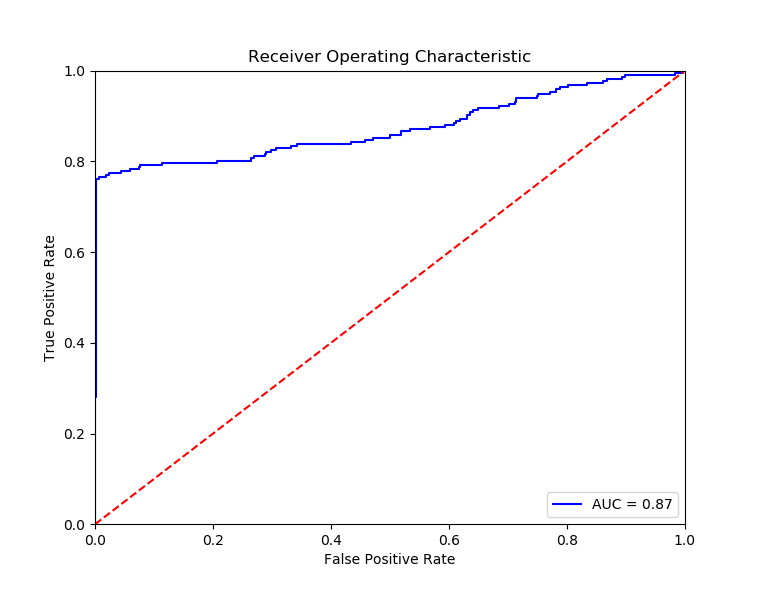

In [508]:
pred = mod_logit_2.predict(X_test)

# draw the ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(test_y, pred)
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC curve is as above and the AUC is a brilliant 0.87. We can hence satisfactorily accept this model.